<div align=center>
		
<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
    <br/>
<font color=#FF7500>
Sharif University of Technology - Departmenet of Computer Engineering
</font>
<p></p>
<font color=blue>
Artifical Intelligence - Dr. Mohammad Hossein Rohban
</font>
<br/>
<br/>
Spring 2022

</div>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Practical Assignment 
            	<br/>
			</font>
    <br/>
    <br/>
<font size=4>
			<br/><br/>
Deadline:  Tir 25
                <br/><b>
              Cheating is Strongly Prohibited
                </b><br/><br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

# Personal Data


In [ ]:
# Set your student number
student_number = 98000000
Name = ''
Last_Name = ''

# Rules
- You are not allowed to use provided codes that can be found on the internet. 
- If you want to use a library which is not already imported, you must ask a question on Quera to get the permission of using that.
- Do not hesitate to ask questions on Quera, if you have any.

in this problem, you are asked to implement a DQN(deep q-learning network) for one of gym environments "PongDeterministic-v4".

# Mastering Atari Games using Deep Reinforcement Learning

In this assignment, you will learn how to implement a Double-Deep-Q-Network (DDQN), and to demonstrate that, you may implement and train a DDQN and run it on an Atari game in **OpenAI-Gym** environment. Additionally, you may also want to refer to the [original paper](https://arxiv.org/pdf/1312.5602.pdf) regarding the usage of DQN in Atari networks. Double-DQN works the same with slight difference in using two identical networks for Q-table. [read this](https://medium.com/@parsa_h_m/deep-reinforcement-learning-dqn-double-dqn-dueling-dqn-noisy-dqn-and-dqn-with-prioritized-551f621a9823)

* **PongDeterministic-v4**: A famous Atari game that is a staple for learning deep q networks. This game is already available in the gym library environment. By solving this completely you will receive 100/100 points.

In the following, you can read the description of the games and how to start running it. We advise using either `Google-Colab` or `Kaggle` for training the model as DQN models usually take a lot of time to train.


# Environment setup and importing libraries

In [ ]:
!nvidia-smi

Sat Jun 18 13:34:41 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install atari-py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gym
import cv2

import time
import json
import random
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from collections import deque

import matplotlib.pyplot as plt
from IPython.display import clear_output

%matplotlib inline

First mount to your colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd "drive/MyDrive/RL-HW7/"

Mounted at /content/drive
/content/drive/MyDrive/RL-HW7


now download ROM.rar from [here](http://www.atarimania.com/rom_collection_archive_atari_2600_roms.html) and then, upload them to the same folder as this google colab is located. Then unrar it using code below:

In [ ]:
!wget http://www.atarimania.com/roms/Roms.rar 

In [ ]:
!unrar x "Roms.rar"

now add them to your python!

In [ ]:
!python -m atari_py.import_roms /content/drive/MyDrive/RL-HW7

copying atlantis.bin from /content/drive/MyDrive/RL-HW7/HC ROMS/BY ALPHABET/A-G/Atlantis.bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/atlantis.bin
copying chopper_command.bin from /content/drive/MyDrive/RL-HW7/HC ROMS/BY ALPHABET/A-G/Chopper Command.bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/chopper_command.bin
copying breakout.bin from /content/drive/MyDrive/RL-HW7/HC ROMS/BY ALPHABET/A-G/Breakout - Breakaway IV.bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/breakout.bin
copying boxing.bin from /content/drive/MyDrive/RL-HW7/HC ROMS/BY ALPHABET/A-G/Boxing.bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/boxing.bin
copying freeway.bin from /content/drive/MyDrive/RL-HW7/HC ROMS/BY ALPHABET/A-G/Freeway.bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/freeway.bin
copying bank_heist.bin from /content/drive/MyDrive/RL-HW7/HC ROMS/BY ALPHABET/A-G/Bank Heist.bin to /usr/local/lib/python3.7/dist-pac

Experiments with the environment

In [ ]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
ENVIRONMENT = "PongDeterministic-v4"

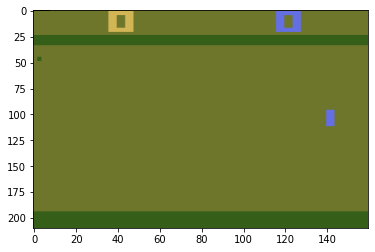

In [ ]:
env = gym.make(ENVIRONMENT)
obs = env.reset()
plt.imshow(env.render(mode='rgb_array'), aspect='auto')
plt.show()

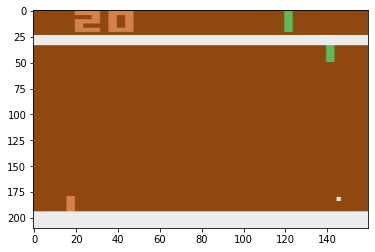

In [ ]:
env = gym.make(ENVIRONMENT)
env.seed(2022)
obs = env.reset()

a = env.action_space.sample()
for i in range(5000):
    a = env.action_space.sample()
    observation, reward, done, info = env.step(a)
    if (i + 1) % 5 == 0:
        clear_output(True)
        screen = env.render(mode='rgb_array')
        plt.imshow(screen, aspect='auto')
        plt.show()
    if done:
        break

In [ ]:
environment = gym.make(ENVIRONMENT)
print("environment observation", environment.observation_space)
print("environment action space", environment.action_space)
environment.reset()
print("next state, reward, done", environment.step( environment.action_space.sample()))

environment observation Box(0, 255, (210, 160, 3), uint8)
environment action space Discrete(6)
 (array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [144,  72,  17],
        [144,  72,  17],
        [144,  72,  17]],

       [[144,  72,  17],
        [144,  72,  17],
        [144,  72,  17],
        ...,
        [144,  72,  17],
        [144,  72,  17],
        [144,  72,  17]],

       [[144,  72,  17],
        [144,  72,  17],
        [144,  72,  17],
        ...,
        [144,  72,  17],
        [144,  72,  17],
        [144,  72,  17]],

       ...,

       [[236, 236, 236],
        [236, 236, 236],
        [236, 236, 236],
        ...,
        [236, 236, 236],
        [236, 236, 236],
        [236, 236, 236]],

       [[236, 236, 236],
        [236, 236, 236],
        [236, 236, 236],
        ...,
        [236, 236, 236],
        [236, 236, 236],
        [236, 236, 236]],

       [[236, 236, 236],
        [236, 236, 236],
        [236, 2

feel free to do more experiments with the environment.

# Hyperparameters

There are some parameters for your implementation. Feel free to change them.

In [ ]:

SAVE_MODELS = True  # Save models to file so you can test later
MODEL_PATH = "./pong-cnn-"  # Models path for saving or loading
SAVE_MODEL_INTERVAL = 10  # Save models at every X epoch
TRAIN_MODEL = True  # Train model while playing (Make it False when testing a model)

LOAD_MODEL_FROM_FILE = False  # Load model from file
LOAD_FILE_EPISODE = 0  # Load Xth episode from file

BATCH_SIZE = 64  # Minibatch size that select randomly from mem for train nets
MAX_EPISODE = 100000  # Max episode
MAX_STEP = 100000  # Max step size for one episode

MAX_MEMORY_LEN = 50000  # Max memory len
MIN_MEMORY_LEN = 40000  # Min memory len before start train

GAMMA = 0.97  # Discount rate
ALPHA = 0.00025  # Learning rate
EPSILON_DECAY = 0.99  # Epsilon decay rate by step

RENDER_GAME_WINDOW = False  # Opens a new window to render the game (Won't work on colab default)

# Image proccessing 

Here you are asked to perform some preprocessing for input and outputs.
You are free to implement CNN. Here is the recommended network [DuelCNN](https://arxiv.org/abs/1511.06581) which a specialized network for RL tasks.

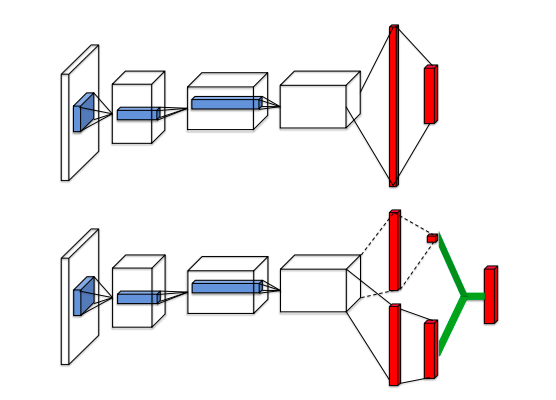

A popular single stream Q-network (top) and the dueling Q-network (bottom). The dueling network has two streams
to separately estimate (scalar) state-value and the advantages for
each action; the green output module implements equation (9)(of the original paper) to
combine them. Both networks output Q-values for each action.

In [ ]:
class DuelCNN(nn.Module):
  
    def __init__(self, h, w, output_size):
        super(DuelCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=4,  out_channels=32, kernel_size=8, stride=4)
        self.bn1 = nn.BatchNorm2d(32)
        convw, convh = self.conv2d_size_calc(w, h, kernel_size=8, stride=4)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=4, stride=2)
        self.bn2 = nn.BatchNorm2d(64)
        convw, convh = self.conv2d_size_calc(convw, convh, kernel_size=4, stride=2)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1)
        self.bn3 = nn.BatchNorm2d(64)
        convw, convh = self.conv2d_size_calc(convw, convh, kernel_size=3, stride=1)

        linear_input_size = convw * convh * 64  # Last conv layer's out sizes

        # Action layer
        self.Alinear1 = nn.Linear(in_features=linear_input_size, out_features=128)
        self.Alrelu = nn.LeakyReLU()  # Linear 1 activation funct
        self.Alinear2 = nn.Linear(in_features=128, out_features=output_size)

        # State Value layer
        self.Vlinear1 = nn.Linear(in_features=linear_input_size, out_features=128)
        self.Vlrelu = nn.LeakyReLU()  # Linear 1 activation funct
        self.Vlinear2 = nn.Linear(in_features=128, out_features=1)  # Only 1 node

    def conv2d_size_calc(self, w, h, kernel_size=5, stride=2):
        """
        Calcs conv layers output image sizes
        """
        next_w = (w - (kernel_size - 1) - 1) // stride + 1
        next_h = (h - (kernel_size - 1) - 1) // stride + 1
        return next_w, next_h

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.relu(self.bn3(self.conv3(x)))

        x = x.view(x.size(0), -1)  # Flatten every batch

        Ax = self.Alrelu(self.Alinear1(x))
        Ax = self.Alinear2(Ax)  # No activation on last layer

        Vx = self.Vlrelu(self.Vlinear1(x))
        Vx = self.Vlinear2(Vx)  # No activation on last layer

        q = Vx + (Ax - Ax.mean())

        return q

# DoubleDQN Agent (DDQN)

Below you are asked to implement a DDQN agent. 

In [ ]:
class Agent:
    def __init__(self, environment):
        """
        Hyperparameters definition for Agent
        """
        # State size for breakout env. SS images (210, 160, 3). Used as input size in network
        self.state_size_h = environment.observation_space.shape[0]
        self.state_size_w = environment.observation_space.shape[1]
        self.state_size_c = environment.observation_space.shape[2]

        # Activation size for breakout env. Used as output size in network
        self.action_size = environment.action_space.n

        # Image pre process params
        self.target_h = 80  # Height after process
        self.target_w = 64  # Widht after process

        self.crop_dim = [20, self.state_size_h, 0, self.state_size_w]  # Cut 20 px from top to get rid of the score table

        # Trust rate to our experiences
        self.gamma = GAMMA  # Discount coef for future predictions
        self.alpha = ALPHA  # Learning Rate

        # After many experinces epsilon will be 0.05
        # So we will do less Explore more Exploit
        self.epsilon = 1  # Explore or Exploit
        self.epsilon_decay = EPSILON_DECAY  # Adaptive Epsilon Decay Rate
        self.epsilon_minimum = 0.05  # Minimum for Explore

        # Deque holds replay mem.
        self.memory = deque(maxlen=MAX_MEMORY_LEN)

        # Create two model for DDQN algorithm
        self.online_model = DuelCNN(h=self.target_h, w=self.target_w, output_size=self.action_size).to(DEVICE)
        self.target_model = DuelCNN(h=self.target_h, w=self.target_w, output_size=self.action_size).to(DEVICE)
        self.target_model.load_state_dict(self.online_model.state_dict())
        self.target_model.eval()

        # Adam used as optimizer
        self.optimizer = optim.Adam(self.online_model.parameters(), lr=self.alpha)

    def preProcess(self, image):
        """
        Process image crop resize, grayscale and normalize the images
        """
        frame = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # To grayscale
        frame = frame[self.crop_dim[0]:self.crop_dim[1], self.crop_dim[2]:self.crop_dim[3]]  # Cut 20 px from top
        frame = cv2.resize(frame, (self.target_w, self.target_h))  # Resize
        frame = frame.reshape(self.target_w, self.target_h) / 255  # Normalize

        return frame

    def act(self, state):
        """
        Get state and do action
        Two option can be selectedd if explore select random action
        if exploit ask nnet for action
        use epsilon greedy algorithm
        """

        act_protocol = 'Explore' if random.uniform(0, 1) <= self.epsilon else 'Exploit'

        if act_protocol == 'Explore':
            action = random.randrange(self.action_size)
        else:
            with torch.no_grad():
                state = torch.tensor(state, dtype=torch.float, device=DEVICE).unsqueeze(0)
                q_values = self.online_model.forward(state)  # (1, action_size)
                action = torch.argmax(q_values).item()  # Returns the indices of the maximum value of all elements

        return action

    def train(self):
        """
        Train neural nets with replay memory
        returns loss and max_q val predicted from online_net
        """
        if len(agent.memory) < MIN_MEMORY_LEN:
            loss, max_q = [0, 0]
            return loss, max_q
        # We get out minibatch and turn it to numpy array
        state, action, reward, next_state, done = zip(*random.sample(self.memory, BATCH_SIZE))

        # Concat batches in one array
        # (np.arr, np.arr) ==> np.BIGarr
        state = np.concatenate(state)
        next_state = np.concatenate(next_state)

        # Convert them to tensors
        state = torch.tensor(state, dtype=torch.float, device=DEVICE)
        next_state = torch.tensor(next_state, dtype=torch.float, device=DEVICE)
        action = torch.tensor(action, dtype=torch.long, device=DEVICE)
        reward = torch.tensor(reward, dtype=torch.float, device=DEVICE)
        done = torch.tensor(done, dtype=torch.float, device=DEVICE)

        # Make predictions
        state_q_values = self.online_model(state)
        next_states_q_values = self.online_model(next_state)
        next_states_target_q_values = self.target_model(next_state)

        # Find selected action's q_value
        selected_q_value = state_q_values.gather(1, action.unsqueeze(1)).squeeze(1)
        # Get indice of the max value of next_states_q_values
        # Use that indice to get a q_value from next_states_target_q_values
        # We use greedy for policy So it called off-policy
        next_states_target_q_value = next_states_target_q_values.gather(1, next_states_q_values.max(1)[1].unsqueeze(1)).squeeze(1)
        # Use Bellman function to find expected q value
        expected_q_value = reward + self.gamma * next_states_target_q_value * (1 - done)

        # Calc loss with expected_q_value and q_value
        loss = (selected_q_value - expected_q_value.detach()).pow(2).mean()

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        return loss, torch.max(state_q_values).item()

    def storeResults(self, state, action, reward, nextState, done):
        """
        Store every result to memory
        """
        self.memory.append([state[None, :], action, reward, nextState[None, :], done])

    def adaptiveEpsilon(self):
        """
        Adaptive Epsilon means every step
        we decrease the epsilon so we do less Explore
        """
        if self.epsilon > self.epsilon_minimum:
            self.epsilon *= self.epsilon_decay

# Learning loop

In [ ]:
environment = gym.make(ENVIRONMENT)  # Get env
agent = Agent(environment)  # Create Agent

if LOAD_MODEL_FROM_FILE:
    agent.online_model.load_state_dict(torch.load(MODEL_PATH+str(LOAD_FILE_EPISODE)+".pkl"))

    with open(MODEL_PATH+str(LOAD_FILE_EPISODE)+'.json') as outfile:
        param = json.load(outfile)
        agent.epsilon = param.get('epsilon')

    startEpisode = LOAD_FILE_EPISODE + 1

else:
    startEpisode = 1

last_100_ep_reward = deque(maxlen=100)  # Last 100 episode rewards
total_step = 1  # Cumulkative sum of all steps in episodes
for episode in range(startEpisode, MAX_EPISODE):

    startTime = time.time()  # Keep time
    state = environment.reset()  # Reset env

    state = agent.preProcess(state)  # Process image

    # Stack state . Every state contains 4 time contionusly frames
    # We stack frames like 4 channel image
    state = np.stack((state, state, state, state))

    total_max_q_val = 0  # Total max q vals
    total_reward = 0  # Total reward for each episode
    total_loss = 0  # Total loss for each episode
    for step in range(MAX_STEP):

        if RENDER_GAME_WINDOW:
            plt.imshow(env.render(mode='rgb_array'), aspect='auto')
            plt.show()  # Show state visually

        # Select and perform an action
        action = agent.act(state)  # Act
        next_state, reward, done, info = environment.step(action)  # Observe

        next_state = agent.preProcess(next_state)  # Process image

        # Stack state . Every state contains 4 time contionusly frames
        # We stack frames like 4 channel image
        next_state = np.stack((next_state, state[0], state[1], state[2]))

        # Store the transition in memory
        agent.storeResults(state, action, reward, next_state, done)  # Store to mem

        # Move to the next state
        state = next_state  # Update state

        if TRAIN_MODEL:
            # Perform one step of the optimization (on the target network)
            loss, max_q_val = agent.train()  # Train with random BATCH_SIZE state taken from mem
        else:
            loss, max_q_val = [0, 0]

        total_loss += loss
        total_max_q_val += max_q_val
        total_reward += reward
        total_step += 1
        if total_step % 1000 == 0:
            agent.adaptiveEpsilon()  # Decrase epsilon

        if done:  # Episode completed
            currentTime = time.time()  # Keep current time
            time_passed = currentTime - startTime  # Find episode duration
            current_time_format = time.strftime("%H:%M:%S", time.gmtime())  # Get current dateTime as HH:MM:SS
            epsilonDict = {'epsilon': agent.epsilon}  # Create epsilon dict to save model as file

            if SAVE_MODELS and episode % SAVE_MODEL_INTERVAL == 0:  # Save model as file
                weightsPath = MODEL_PATH + str(episode) + '.pkl'
                epsilonPath = MODEL_PATH + str(episode) + '.json'

                torch.save(agent.online_model.state_dict(), weightsPath)
                with open(epsilonPath, 'w') as outfile:
                    json.dump(epsilonDict, outfile)

            if TRAIN_MODEL:
                agent.target_model.load_state_dict(agent.online_model.state_dict())  # Update target model

            last_100_ep_reward.append(total_reward)
            avg_max_q_val = total_max_q_val / step

            outStr = "Episode:{} Time:{} Reward:{:.2f} Loss:{:.2f} Last_100_Avg_Rew:{:.3f} Avg_Max_Q:{:.3f} Epsilon:{:.2f} Duration:{:.2f} Step:{} CStep:{}".format(
                episode, current_time_format, total_reward, total_loss, np.mean(last_100_ep_reward), avg_max_q_val, agent.epsilon, time_passed, step, total_step
            )

            print(outStr)

            if SAVE_MODELS:
                outputPath = MODEL_PATH + "out" + '.txt'  # Save outStr to file
                with open(outputPath, 'a') as outfile:
                    outfile.write(outStr+"\n")

            break

Episode:1 Time:09:55:24 Reward:-21.00 Loss:0.00 Last_100_Avg_Rew:-21.000 Avg_Max_Q:0.000 Epsilon:0.99 Duration:0.82 Step:1001 CStep:1003
Episode:2 Time:09:55:25 Reward:-21.00 Loss:0.00 Last_100_Avg_Rew:-21.000 Avg_Max_Q:0.000 Epsilon:0.99 Duration:1.19 Step:911 CStep:1915
Episode:3 Time:09:55:26 Reward:-21.00 Loss:0.00 Last_100_Avg_Rew:-21.000 Avg_Max_Q:0.000 Epsilon:0.98 Duration:0.70 Step:851 CStep:2767
Episode:4 Time:09:55:26 Reward:-21.00 Loss:0.00 Last_100_Avg_Rew:-21.000 Avg_Max_Q:0.000 Epsilon:0.97 Duration:0.72 Step:872 CStep:3640
Episode:5 Time:09:55:27 Reward:-20.00 Loss:0.00 Last_100_Avg_Rew:-20.800 Avg_Max_Q:0.000 Epsilon:0.96 Duration:0.96 Step:1149 CStep:4790
Episode:6 Time:09:55:28 Reward:-20.00 Loss:0.00 Last_100_Avg_Rew:-20.667 Avg_Max_Q:0.000 Epsilon:0.95 Duration:0.71 Step:837 CStep:5628
Episode:7 Time:09:55:29 Reward:-20.00 Loss:0.00 Last_100_Avg_Rew:-20.571 Avg_Max_Q:0.000 Epsilon:0.94 Duration:0.80 Step:962 CStep:6591
Episode:8 Time:09:55:30 Reward:-20.00 Loss:0.0

KeyboardInterrupt: ignored

#play


play with your trained agent! (show the game in a gif!)

# Analysis of results

Analyse your results.

Q-values, actions, total rewards, and number of steps per epsiode.

Use convinient plots to support your statements.